In [1]:
import numpy as np 
import os
import random
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
path = 'C:/Users/Usuario/OneDrive/Escritorio/Alzheimer Disease Model Predict/dataset/'

def collect_image_paths(directory):
    paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
    return paths
    
path1 = collect_image_paths(os.path.join(path, 'Data/Non Demented'))
path2 = collect_image_paths(os.path.join(path, 'Data/Mild Dementia'))
path3 = collect_image_paths(os.path.join(path, 'Data/Moderate Dementia'))
path4 = collect_image_paths(os.path.join(path, 'Data/Very mild Dementia'))

# Tamano maximo de imagenes a muestrear
size = 400

# Semilla random
random.seed(42)

# Muestreo aleatorio de las rutas de las imagenes
sample_path1 = random.sample(path1, min(size, len(path1)))
sample_path2 = random.sample(path2, min(size, len(path2)))
sample_path3 = random.sample(path3, min(size, len(path3)))
sample_path4 = random.sample(path4, min(size, len(path4)))

# Impresion de la cantidad de rutas muestreadas
print(f'Sampled {len(sample_path1)} paths from Non Demented')
print(f'Sampled {len(sample_path2)} paths from Mild Dementia')
print(f'Sampled {len(sample_path3)} paths from Moderate Dementia')
print(f'Sampled {len(sample_path4)} paths from Very mild Dementia')

Sampled 400 paths from Non Demented
Sampled 400 paths from Mild Dementia
Sampled 400 paths from Moderate Dementia
Sampled 400 paths from Very mild Dementia


Classe 'Non Demented': 67222 imagens
Classe 'Mild Dementia': 5002 imagens
Classe 'Moderate Dementia': 488 imagens
Classe 'Very mild Dementia': 13725 imagens


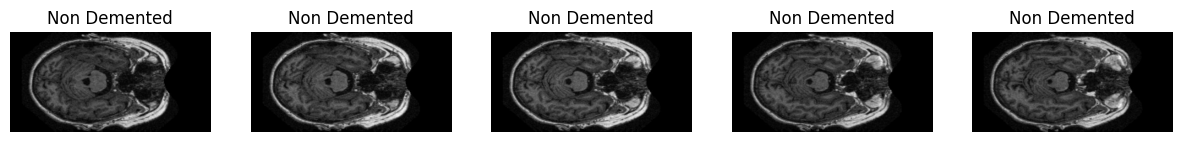

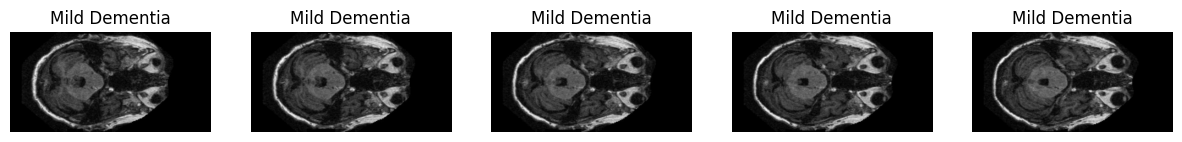

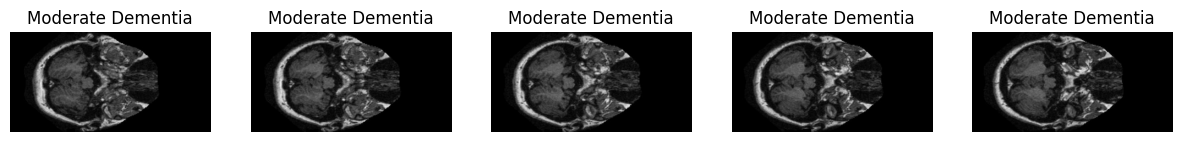

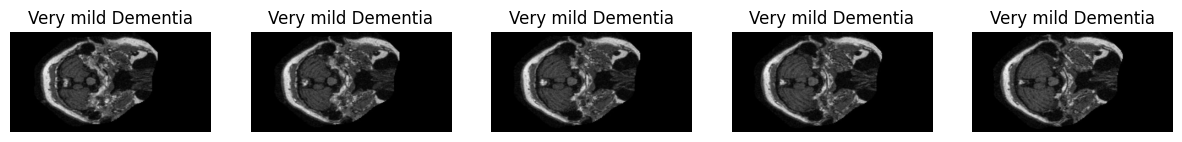

C:\Users\Usuario\AppData\Local\Temp\ipykernel_41172\3783537417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Class", y="Amount", data=df_distribution, palette="viridis")


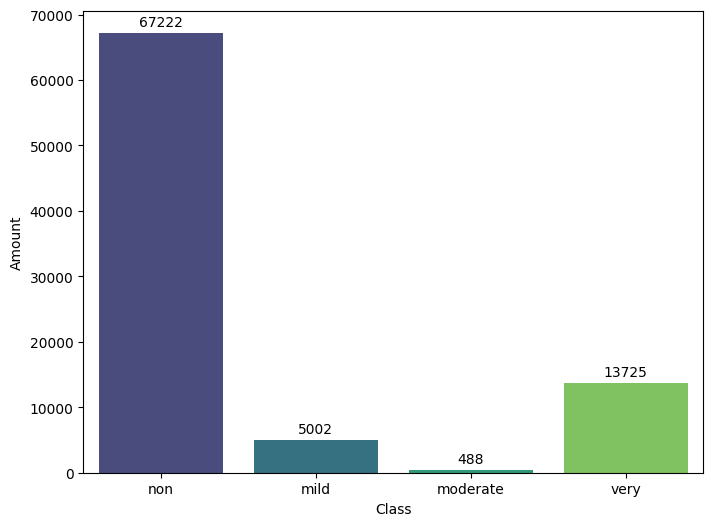

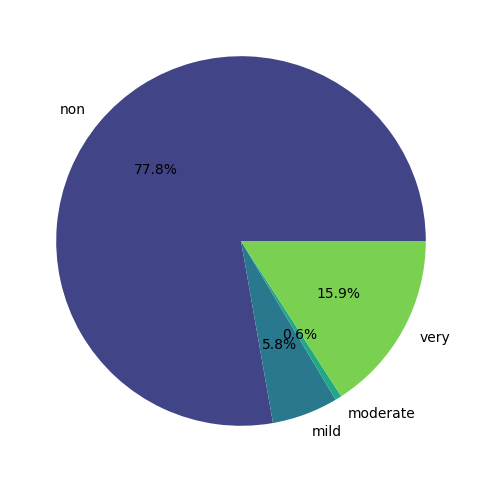

In [7]:
classes = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very mild Dementia']
for class_name in classes:
    class_path = os.path.join(path, f"Data/{class_name}")
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    print(f"Classe '{class_name}': {num_images} imagens")

def show_images_from_class(class_name, num_images=5):
    class_path = os.path.join(path, f"Data/{class_name}")
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(images[:num_images]):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    plt.show()

for class_name in classes:
    show_images_from_class(class_name)

data_distribution = []
for class_name in classes:
    class_path = os.path.join(path, f"Data/{class_name}")
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    data_distribution.append({"Class": class_name, "Amount": num_images})

df_distribution = pd.DataFrame(data_distribution)

df_distribution['Class'] = ['non', 'mild', 'moderate', 'very']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Class", y="Amount", data=df_distribution, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.figure(figsize=(8, 6))
plt.pie(labels = df_distribution['Class'], x = df_distribution['Amount'], autopct='%1.1f%%', colors=sns.color_palette("viridis", len(df_distribution)))
plt.show()

In [8]:
dimensions = []
for class_name in classes:
    class_path = os.path.join(path, f"Data/{class_name}")
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    for img_path in images:
        with Image.open(img_path) as img:
            dimensions.append(img.size)

df_dimensions = pd.DataFrame(dimensions, columns=["Largura", "Altura"])

print("Image Sizes:")
print(df_dimensions.describe())

Image Sizes:
       Largura   Altura
count  86437.0  86437.0
mean     496.0    248.0
std        0.0      0.0
min      496.0    248.0
25%      496.0    248.0
50%      496.0    248.0
75%      496.0    248.0
max      496.0    248.0


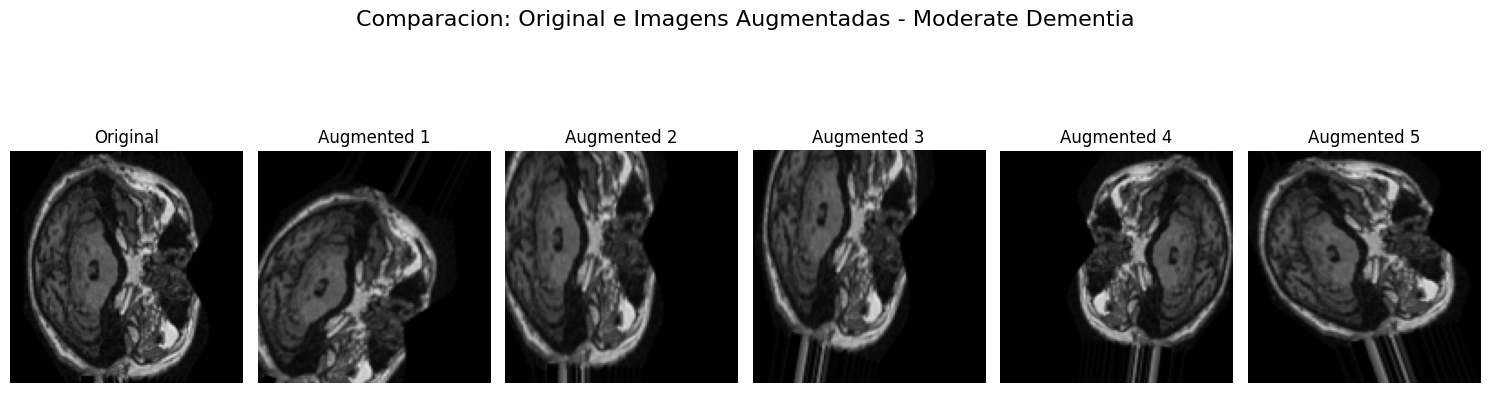

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Configurar transformador de imagenes
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Seleccionar una imagen de la clase 'Moderate Dementia'
img_path = sample_path3[2]  # Elegir una imagen de la clase 'Moderate Dementia'
img = Image.open(img_path).resize((128, 128))
img_array = np.array(img).reshape((1,) + img.size + (3,))  # Redimensionar para el formato esperado por el datagen

# Generar imágenes aumentadas
plt.figure(figsize=(15, 5))

# Mostrar la imagen original
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Mostrar imágenes aumentadas
for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
    augmented_img = batch[0].astype(np.uint8)  # Convertir a formato visualizable
    plt.subplot(1, 6, i + 2)
    plt.imshow(augmented_img)
    plt.title(f"Aumentada {i+1}")
    plt.axis('off')
    if i == 4:  # Mostrar 5 imágenes aumentadas
        break

plt.suptitle("Comparación: Original e Imágenes Aumentadas - Moderate Dementia", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Variables dummys
encoder = OneHotEncoder()

encoder.fit([[0], [1], [2], [3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [22]:
data = []
result = []
for path in sample_path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in sample_path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in sample_path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in sample_path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())
data = np.array(data)
data.shape

(1600, 128, 128, 3)

In [24]:
result = np.array(result)
result = result.reshape((1600,4))
result.shape

(1600, 4)

In [32]:
# Dividiendo la data
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

In [ ]:
# Construccion CNN
import os
from keras.models import load_model
import json

model_path = "C:/Users/Usuario/OneDrive/Escritorio/Alzheimer Disease Model Predict/app/modelo/alzheimer_model.keras"
history_path = "C:/Users/Usuario/OneDrive/Escritorio/Alzheimer Disease Model Predict/app/modelo/training_history.json"
enable_load_model = True

if os.path.exists(model_path) and enable_load_model:
    print("Cargando modelo guardado...")
    model = load_model(model_path)

    if os.path.exists(history_path):
      with open(history_path, "r") as f:
        history = json.load(f)
      print("Histórico de entrenamiento cargado con éxito!")
    else:
      history = None
      print("Histórico de entrenamiento no encontrado.")
else:
  print("Ningún modelo guardado encontrado. Creando un nuevo modelo...")
  model = Sequential()

  model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
  model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
  model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
              
  model.add(Dense(512,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4,activation='softmax'))
              
  model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])

  # train the model
  history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))
  model.save(model_path)

  with open(history_path, "w") as f:
    json.dump(history.history, f)
    history = history.history
    
print(model.summary())

Nenhum modelo salvo encontrado. Criando um novo modelo...


c:\Users\Usuario\OneDrive\Escritorio\Alzheimer Disease Model Predict\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 36s 252ms/step - accuracy: 0.5176 - loss: 6.5784 - val_accuracy: 0.6958 - val_loss: 0.7980
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 230ms/step - accuracy: 0.7191 - loss: 0.7801 - val_accuracy: 0.7250 - val_loss: 0.7964
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.7926 - loss: 0.5693 - val_accuracy: 0.7458 - val_loss: 0.6113
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.8000 - loss: 0.4720 - val_accuracy: 0.7792 - val_loss: 0.5365
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.8412 - loss: 0.4075 - val_accuracy: 0.8208 - val_loss: 0.4751
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 226ms/step - accuracy: 0.8669 - loss: 0.3420 - val_accuracy: 0.8125 - val_loss: 0.5313
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 227ms/step - accuracy: 0.8853 - loss: 0.2739 - val_accuracy: 0.8625 - val_loss: 0.4606
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 226ms/step - accuracy: 0.8978 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,759,502 (384.37 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 67,172,874 (256.24 MB)

None


In [34]:
y_train.shape

(1360, 4)

In [35]:
x_train.shape

(1360, 128, 128, 3)

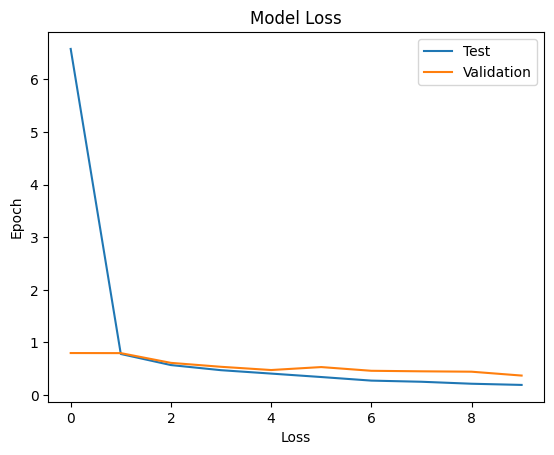

In [36]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [37]:
from matplotlib.pyplot import imshow

def names(number):
    if number == 0:
        return 'Sem demência'
    elif number == 1:
        return 'Demência Leve'
    elif number == 2:
        return 'Demência Moderada'
    elif number == 3:
        return 'Demência Muito Leve'
    else:
        return 'Erro na Predição'

def print_prediction(img_url): 
    img = Image.open(img_url).convert("RGB")
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res=model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100)+ '% de confiança de ser '+ names(classification))
        
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia 

C:/Users/Usuario/OneDrive/Escritorio/Alzheimer Disease Model Predict/dataset/Data/Very mild Dementia\OAS1_0352_MR1_mpr-3_141.jpg
73.38007% de confiança de ser Demência Muito Leve


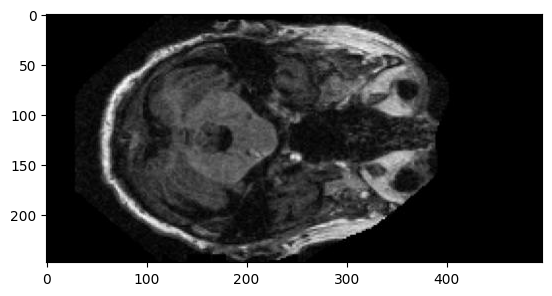

In [38]:
path_test = os.path.join(path, r'C:\Users\Usuario\OneDrive\Escritorio\Alzheimer Disease Model Predict\dataset\Data\Mild Dementia\OAS1_0028_MR1_mpr-1_100.jpg')
print(path)
print_prediction(path_test)

In [39]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8667 - loss: 0.3698
Test Loss: 0.3698
Test Accuracy: 0.8667


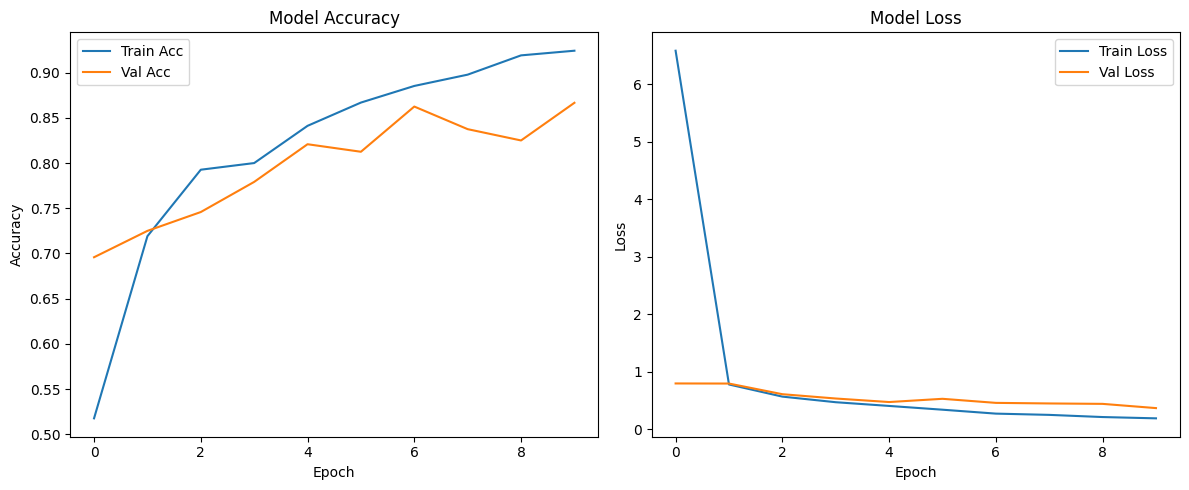

In [40]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        72
           1       0.94      0.94      0.94        62
           2       0.97      1.00      0.98        57
           3       0.83      0.61      0.71        49

    accuracy                           0.87       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.87      0.86       240



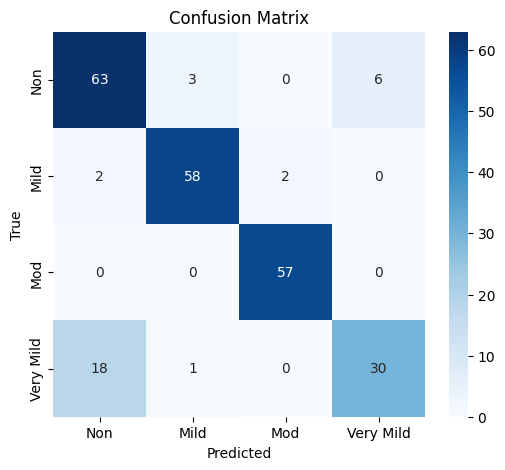

: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non", "Mild", "Mod", "Very Mild"], yticklabels=["Non", "Mild", "Mod", "Very Mild"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()